# Decision Trees
It's an form of supervisioned learning, that makes decisions based on trees (the data structure).
The whole point is make an tree, based on the data, that can make decisions based on a set of variables.

## Example
Create a decision tree based on historical hiring data. The algorithm to build the tree will use information such as years of experience, level of education, whether the candidate is currently employed, and whether the candidate accepted the job offer. With the tree built, we can use new data to make predictions.


## How it works?
- At each step, find the attribute that can be used to partition the data set to minimize entropy of the data.
- The name of the algorithm is ID3.
- Its a greedy algorithm (try the best step every time) - as it goes down the tree, picks the decision that reduce entropy the most at that stage.
    - that might not actually result in an optimal tree (if is the same logic of the coin problem, DP just solve it)
    - BUt it works


## Random Forests
- Decision trees are very susceptible to overfitting.
- To fight this, we can construct several alternate decision trees, and let them vote on the final classification.
    - Randomly re-sample the input data for each tree (bootstrap aggregating or bagging)
    - Randomize a subset of the attributes each step is allowed to choose from

# Code

In [53]:
# Import das bibliotecas
import numpy as np
import pandas as pd
from sklearn import tree

# Import dos dados
input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [54]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [55]:
# Muda as respostas Y e N para 1 e 0 (o algoritmo precisa dessa limpeza dos dados para funcionar)
# É necessario que os dados sejam numericos
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [56]:
# Separa as features das respostas (ser contratado ou não)
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [57]:
# Justamente o que eu falei, cria um dataset para as respostas (y) e um
# Para as caracteristicas do candidato (X)
y = df["Hired"]
X = df[features]
# Instancia o classifiador e executa o algoritmo para X e y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

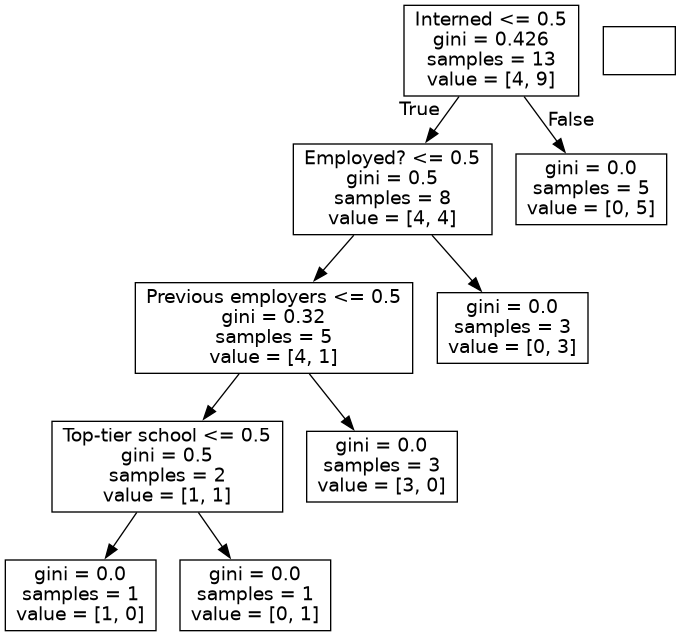

In [58]:
# import das bibliotecas
from IPython.display import Image  
from io import StringIO  
# Essa biblioteca oferece comunicação com a graphivz
import pydotplus

# Gera a imagem utilizando a graphviz, onde podemos vizualizar a arvore
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [60]:
# Gera uma random forest
from sklearn.ensemble import RandomForestClassifier

# Como a decision tree, veio do pacote sklearn
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

# Previsoes realizadas
#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Activity

In [44]:
# modificando os dados para inverter as contratações (basicamente neagar a coluna hiring)
neg_y = y.copy()

In [72]:
# Dados invertidos
neg_y = neg_y.apply(lambda x: int(not x))

In [119]:
# Arvore normal
clf_1 = tree.DecisionTreeClassifier()
clf_1 = clf_1.fit(X, y)

In [101]:
# Cria a nova arvore "invertida"
clf_2 = tree.DecisionTreeClassifier()
clf_2 = clf_2.fit(X,neg_y)

In [102]:
# Random forest normal
clf_3 = RandomForestClassifier(n_estimators=10)
clf_3 = clf_3.fit(X, y)

In [103]:
# Random forest invertida
clf_4 = RandomForestClassifier(n_estimators=10)
clf_4 = clf_4.fit(X, neg_y)

In [121]:
# Resposta esperada
print(clf_1.predict([[10, 1, 4, 0, 0, 0]]))
print(clf_1.predict([[10, 0, 4, 0, 0, 0]]))
print(clf_1.predict([[3, 0, 0, 3, 1, 0]]))
print(clf_1.predict([[0, 0, 0, 0, 0, 0]]))

[1]
[0]
[1]
[0]


/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [105]:
# Resposta invertida
print(clf_2.predict([[10, 1, 4, 0, 0, 0]]))
print(clf_2.predict([[10, 0, 4, 0, 0, 0]]))
print(clf_2.predict([[3, 0, 0, 3, 1, 0]]))
print(clf_2.predict([[0, 0, 0, 0, 0, 0]]))

[0]
[1]
[0]
[1]


/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [106]:
# Resposta esperada
print(clf_3.predict([[10, 1, 4, 0, 0, 0]]))
print(clf_3.predict([[10, 0, 4, 0, 0, 0]]))
print(clf_3.predict([[3, 0, 0, 3, 1, 0]]))
print(clf_3.predict([[0, 0, 0, 0, 0, 0]]))

[1]
[0]
[1]
[0]


/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [122]:
# Resposta invertida
print(clf_4.predict([[10, 1, 4, 0, 0, 0]]))
print(clf_4.predict([[10, 0, 4, 0, 0, 0]]))
print(clf_4.predict([[3, 0, 0, 3, 1, 0]]))
print(clf_4.predict([[0, 0, 0, 0, 0, 0]]))

[0]
[1]
[0]
[1]


/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/yurivzz/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
